In [35]:
from functions3 import *
from multiprocessing import Pool
import matplotlib.ticker as tick
import glob
import numpy as np
import datetime
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from collections import Counter
from ast import literal_eval

In [2]:
df = pd.read_pickle("Processed_Data/mask_tweets.pkl")

In [3]:
df2 = df[["userid", "date", "text", "hashtag", "country", "state"]]
df2["ts_index"] = df2.date.dt.round("7D")
df2.ts_index = df2.ts_index.dt.date
df_TS = df2.ts_index.value_counts().sort_index()

C:\Users\User\anaconda3\envs\networks\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\anaconda3\envs\networks\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [4]:
df2[df2.ts_index == datetime.date(2020,7,2)].text.value_counts()

RT @RandyRainbow: 🎶Don't spread droplets all over the place, just cover your freakin' face🎶 #CoverYourFreakinFace #WearAMask 😷🙄 https://t.c…                                                                                                                            10005
RT @PatrickDempsey: It’s a Beautiful Day to Save Lives.  @DempseyCenter  #WearAMask #COVID19 #YourActionsSaveLives https://t.co/s3CWcE1lfL                                                                                                                               7907
RT @johnlegend: Everyone, please #WearAMask and social distance this weekend and for  the foreseeable future until we beat this disease!  R…                                                                                                                             5716
RT @DrRobDavidson: I #WearAMask for my entire shift in the ER. There are ZERO harmful effects of wearing a mask, and you could save someone…                                                  

In [5]:
EVENTS = {datetime.date(2020,7,2): "1. Raindrop parody \n2. Patric Dempsey w/ mask \n3. John Legend w/ mask",
          datetime.date(2020,8,20): "Dr.Tedros thanks \nBTS and BTS_Army",
          datetime.date(2020,9,24): "UNGA/Dr.Tedros thanks \nBTS and J-Hope Twitter \nTwitter like icon shifts",
          datetime.date(2020,10,22): "Dr. Eric Ding Tweets \nBe Our Guest parody",
         datetime.date(2020,11,19): "Thanksgiving",
         }

(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 <a list of 6 Text yticklabel objects>)

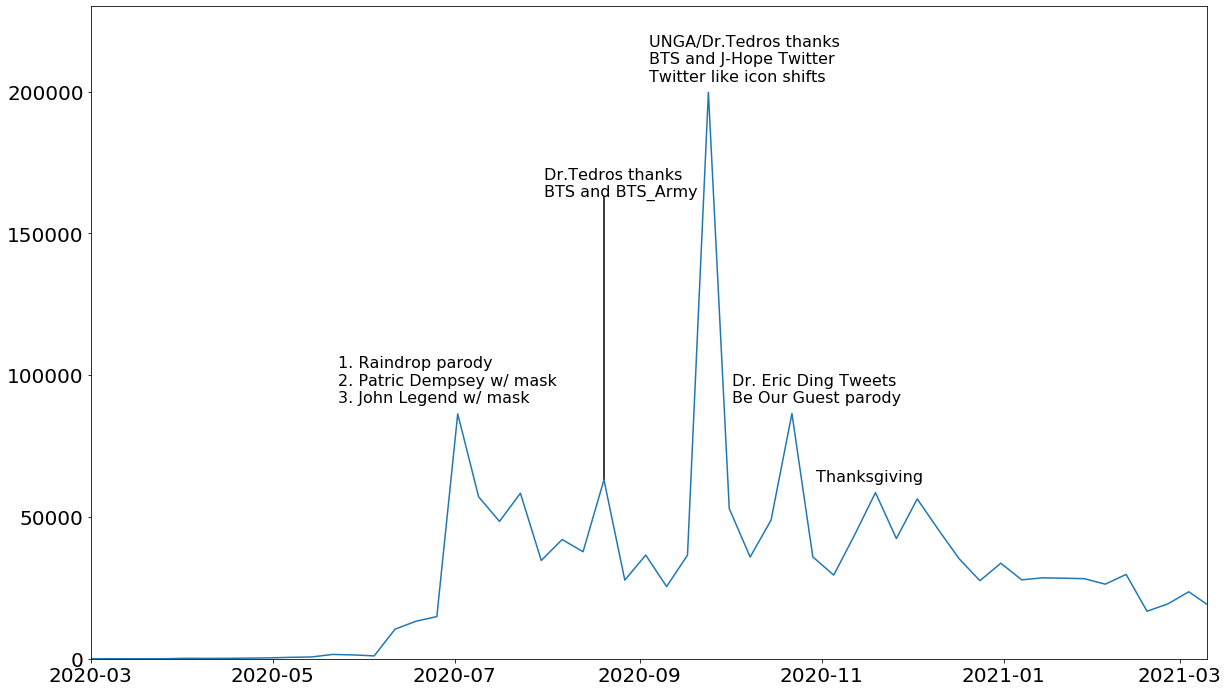

In [9]:
plt.figure(figsize=(20,12))
plt.plot(df_TS.index, df_TS.values, label = r"#WearAMask")
for i,(k,v) in enumerate(EVENTS.items()):
    try:
        height = df_TS[df_TS.index == k]
        if k == datetime.date(2020,8,20):
            plt.vlines(k,height,height+100000)
            plt.annotate(v, (k-datetime.timedelta(days=20),height+100000), fontsize=16)
        elif k == datetime.date(2020,7,2):
#             plt.vlines(k,height,height+100000)
            plt.annotate(v, (k-datetime.timedelta(days=40),height+4000), fontsize=16)
        else:
            plt.annotate(v, (k-datetime.timedelta(days=20),height+4000), fontsize=16)
    except:
        pass
plt.xlim(datetime.date(2020,3,1),datetime.date(2021,3,10))
plt.ylim(0,230000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [6]:
df3 = pd.read_pickle("Processed_Data/topics_tagged.pkl")
df3["ts_index"] = df3.date.dt.round("7D")
df3.ts_index = df3.ts_index.dt.date

In [7]:
EVENTS = {datetime.date(2020,2,27): "K-ARMY donates concert ticket \n refunds to COVID-19 relief.",
          datetime.date(2020,6,25): "BTS donates 1M to BLM, \n 2M to Yemen.",
          datetime.date(2020,8,20): "Dynamite released; WHO retweets \n and reminds world to #WearAMask",
          datetime.date(2020,9,24): "United Nations General Assembly; \n Opening up about Dynamite to address \n Mental Health",
          datetime.date(2020,11,19): "Grammy Nomination for BE; \n #LifeGOesOn",
         datetime.date(2021,2,25): "German radio presenter \n equates BTS with Covid-19"}

2020-02-22
2020-06-20
2020-08-15
2020-09-19
2020-11-14
2021-02-20


Text(0, 0.5, 'Tweet Volume')

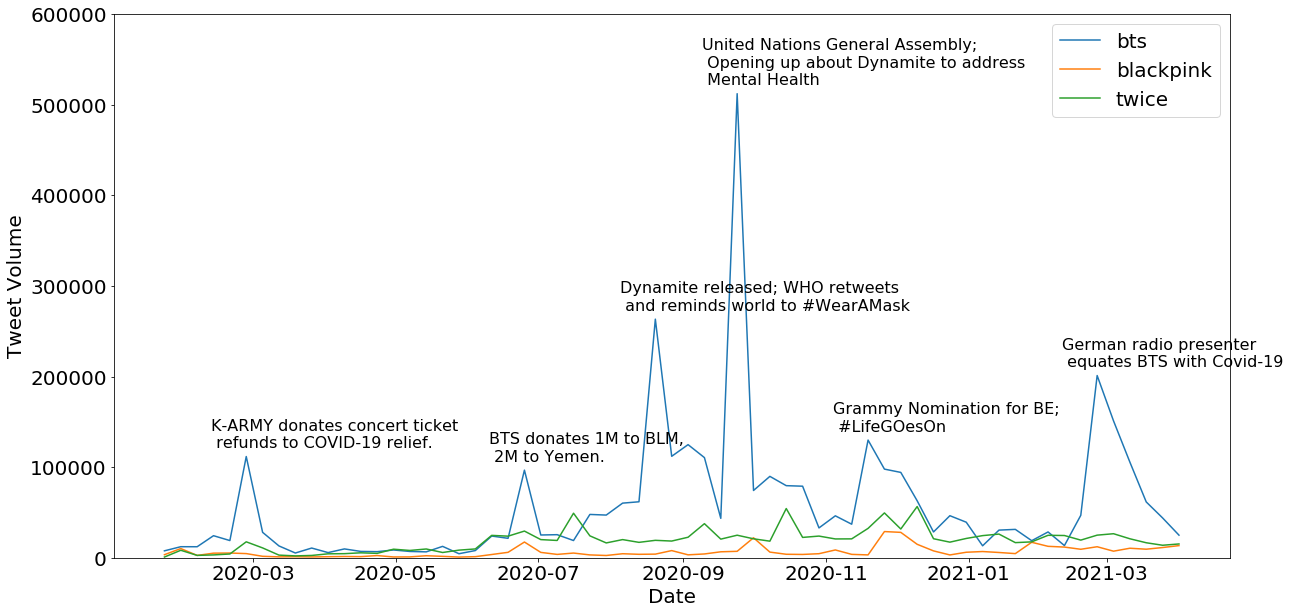

In [8]:
plt.figure(figsize= (20,10))

for top in ["bts", "blackpink", "twice"]:
    df_TS = df3[df3[top]].ts_index.value_counts().sort_index()
    plt.plot(df_TS.index, df_TS.values, label= top)
    
df_TS = df3[df3["bts"]].ts_index.value_counts().sort_index()
for i,(k,v) in enumerate(EVENTS.items()):
    print(k-datetime.timedelta(days=5))
    height = df_TS[df_TS.index == k]
    plt.annotate(v, (k-datetime.timedelta(days=15),height+10000), fontsize=16)
plt.ylim(0,600000)    
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Tweet Volume", fontsize=20)


2020-02-22
2020-06-20
2020-08-15
2020-09-19
2020-11-14
2021-02-20


Text(0, 0.5, 'Tweet Volume')

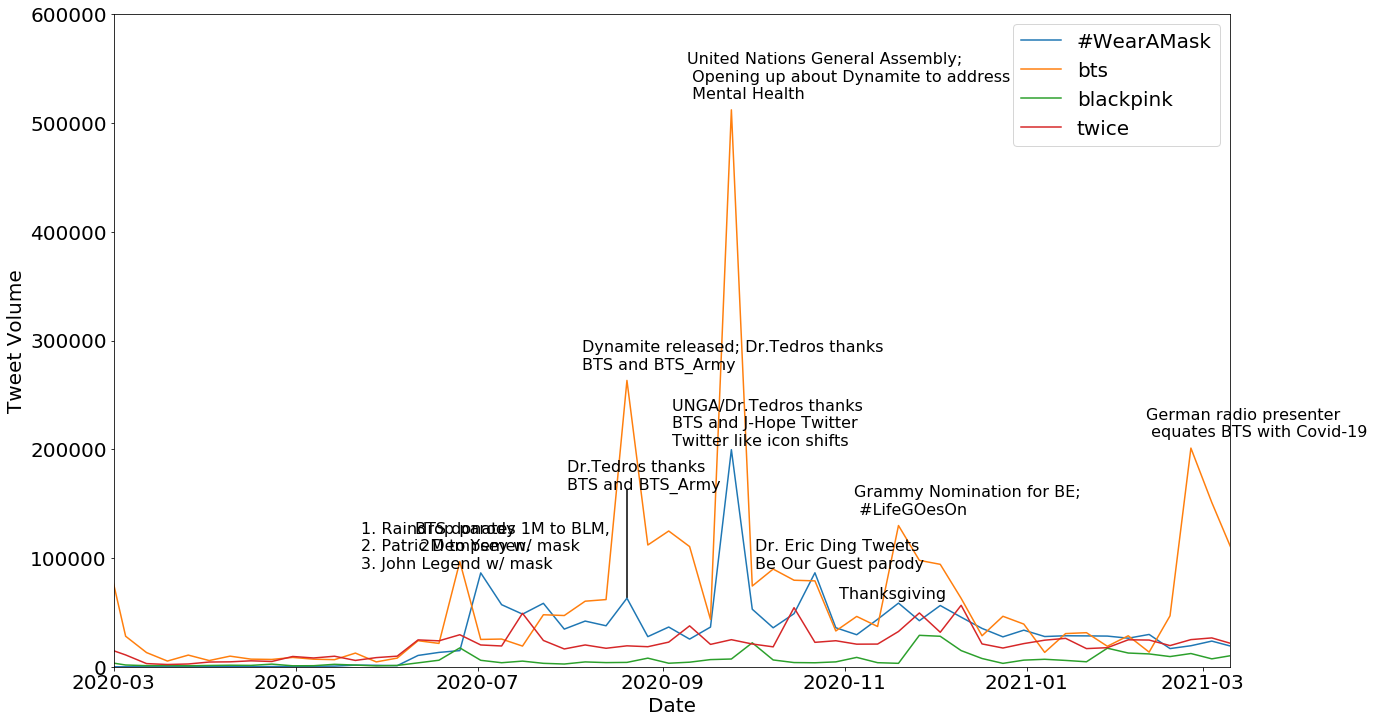

In [9]:
plt.figure(figsize=(20,12))

EVENTS = {datetime.date(2020,7,2): "1. Raindrop parody \n2. Patric Dempsey w/ mask \n3. John Legend w/ mask",
          datetime.date(2020,8,20): "Dr.Tedros thanks \nBTS and BTS_Army",
          datetime.date(2020,9,24): "UNGA/Dr.Tedros thanks \nBTS and J-Hope Twitter \nTwitter like icon shifts",
          datetime.date(2020,10,22): "Dr. Eric Ding Tweets \nBe Our Guest parody",
         datetime.date(2020,11,19): "Thanksgiving",
         }
df_TS = df2.ts_index.value_counts().sort_index()
plt.plot(df_TS.index, df_TS.values, label = r"#WearAMask")
for i,(k,v) in enumerate(EVENTS.items()):
    try:
        height = df_TS[df_TS.index == k]
        if k == datetime.date(2020,8,20):
            plt.vlines(k,height,height+100000)
            plt.annotate(v, (k-datetime.timedelta(days=20),height+100000), fontsize=16)
        elif k == datetime.date(2020,7,2):
#             plt.vlines(k,height,height+100000)
            plt.annotate(v, (k-datetime.timedelta(days=40),height+4000), fontsize=16)
        else:
            plt.annotate(v, (k-datetime.timedelta(days=20),height+4000), fontsize=16)
    except:
        pass
plt.xlim(datetime.date(2020,3,1),datetime.date(2021,3,10))
plt.ylim(0,230000)
plt.xticks(fontsize=20)


EVENTS = {datetime.date(2020,2,27): "K-ARMY donates concert ticket \n refunds to COVID-19 relief.",
          datetime.date(2020,6,25): "BTS donates 1M to BLM, \n 2M to Yemen.",
          datetime.date(2020,8,20): "Dynamite released; Dr.Tedros thanks \nBTS and BTS_Army",
          datetime.date(2020,9,24): "United Nations General Assembly; \n Opening up about Dynamite to address \n Mental Health",
          datetime.date(2020,11,19): "Grammy Nomination for BE; \n #LifeGOesOn",
         datetime.date(2021,2,25): "German radio presenter \n equates BTS with Covid-19"}
for top in ["bts", "blackpink", "twice"]:
    df_TS = df3[df3[top]].ts_index.value_counts().sort_index()
    plt.plot(df_TS.index, df_TS.values, label= top)
    
df_TS = df3[df3["bts"]].ts_index.value_counts().sort_index()
for i,(k,v) in enumerate(EVENTS.items()):
    print(k-datetime.timedelta(days=5))
    height = df_TS[df_TS.index == k]
    plt.annotate(v, (k-datetime.timedelta(days=15),height+10000), fontsize=16)
plt.ylim(0,600000)    
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Tweet Volume", fontsize=20)


In [93]:
def ytick_formatter(x,y):
    return str(x)[:3] + "k"

2020-02-22
2020-06-20
2020-08-15
2020-09-19
2020-11-14


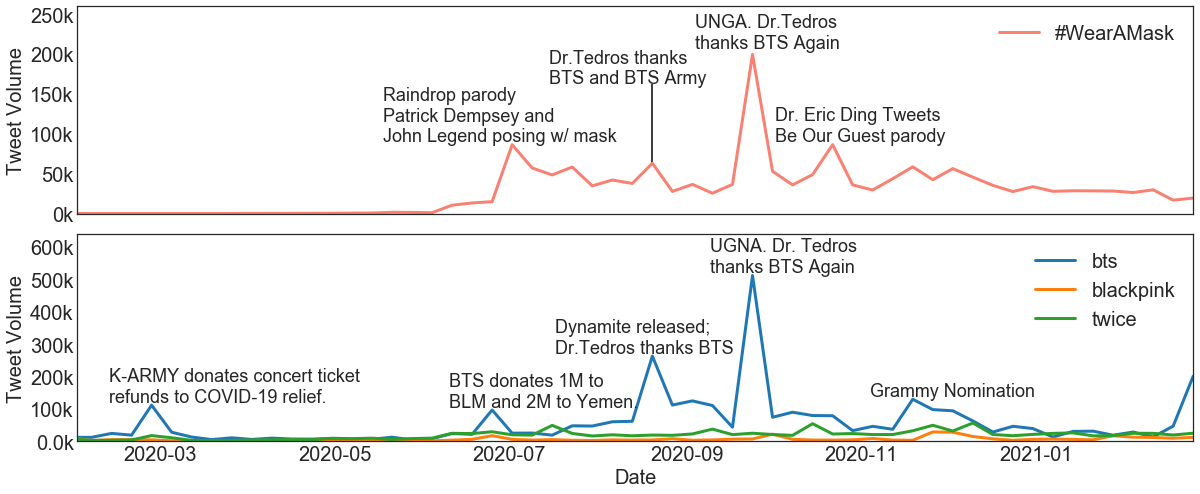

In [101]:
plt.figure(figsize=(20,8))
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.subplot(2,1,1)
EVENTS = {datetime.date(2020,7,2): "Raindrop parody \nPatrick Dempsey and \nJohn Legend posing w/ mask",
          datetime.date(2020,8,20): "Dr.Tedros thanks \nBTS and BTS Army",
          datetime.date(2020,9,24): "UNGA. Dr.Tedros \nthanks BTS Again",
          datetime.date(2020,10,22): "Dr. Eric Ding Tweets \nBe Our Guest parody",
#          datetime.date(2020,11,19): "Thanksgiving",
         }
df_TS = df2.ts_index.value_counts().sort_index()
plt.plot(df_TS.index, df_TS.values, label = r"#WearAMask", color="salmon", linewidth=3)
for i,(k,v) in enumerate(EVENTS.items()):
    try:
        height = df_TS[df_TS.index == k]
        if k == datetime.date(2020,8,20):
            plt.vlines(k,height,height+100000)
            plt.annotate(v, (k-datetime.timedelta(days=36),height+100000), fontsize=18)
        elif k == datetime.date(2020,7,2):
#             plt.vlines(k,height,height+100000)
            plt.annotate(v, (k-datetime.timedelta(days=45),height+4000), fontsize=18)
        elif k == datetime.date(2020,9,24):
            plt.annotate(v, (k-datetime.timedelta(days=20),height+8000), fontsize=18)
        else:
            plt.annotate(v, (k-datetime.timedelta(days=20),height+4000), fontsize=18)
    except:
        pass
plt.xlim(datetime.date(2020,2,1),datetime.date(2021,2,25))
plt.ylim(0,260000)
# plt.xticks(fontsize=20)
plt.xticks([])
# plt.yticks(fontsize=20)
plt.yticks(range(0,250001, 50000), [str(x)+"k" for x in range(0,251,50)], fontsize=20)
plt.ylabel("Tweet Volume", fontsize=20)
plt.legend(fontsize=20)
# plt.gca().yaxis.set_major_formatter(tick.FuncFormatter(ytick_formatter))

EVENTS = {datetime.date(2020,2,27): "K-ARMY donates concert ticket\nrefunds to COVID-19 relief.",
          datetime.date(2020,6,25): "BTS donates 1M to\nBLM and 2M to Yemen.",
          datetime.date(2020,8,20): "Dynamite released; \nDr.Tedros thanks BTS",
          datetime.date(2020,9,24): "UGNA. Dr. Tedros\nthanks BTS Again",
          datetime.date(2020,11,19): "Grammy Nomination",
#          datetime.date(2021,2,25): "German radio presenter \n equates BTS with Covid-19"
         }
plt.subplot(2,1,2)
for top in ["bts", "blackpink", "twice"]:
    df_TS = df3[df3[top]].ts_index.value_counts().sort_index()
    plt.plot(df_TS.index, df_TS.values, label= top, linewidth=3)
    
df_TS = df3[df3["bts"]].ts_index.value_counts().sort_index()
for i,(k,v) in enumerate(EVENTS.items()):
    print(k-datetime.timedelta(days=5))
    height = df_TS[df_TS.index == k]
    if k == datetime.date(2020,8,20):
#         plt.vlines(k,height,height+100000)
        plt.annotate(v, (k-datetime.timedelta(days=34),height+10000), fontsize=18)
    else:
        plt.annotate(v, (k-datetime.timedelta(days=15),height+10000), fontsize=18)
    

plt.xlim(datetime.date(2020,2,1),datetime.date(2021,2,25))
plt.ylim(0,640000)    
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Tweet Volume", fontsize=20)
plt.gca().yaxis.set_major_formatter(tick.FuncFormatter(ytick_formatter))

plt.savefig("Double_TS-1.png",bbox_inches="tight")

2020-02-22
2020-06-20
2020-08-15
2020-09-19
2020-11-14


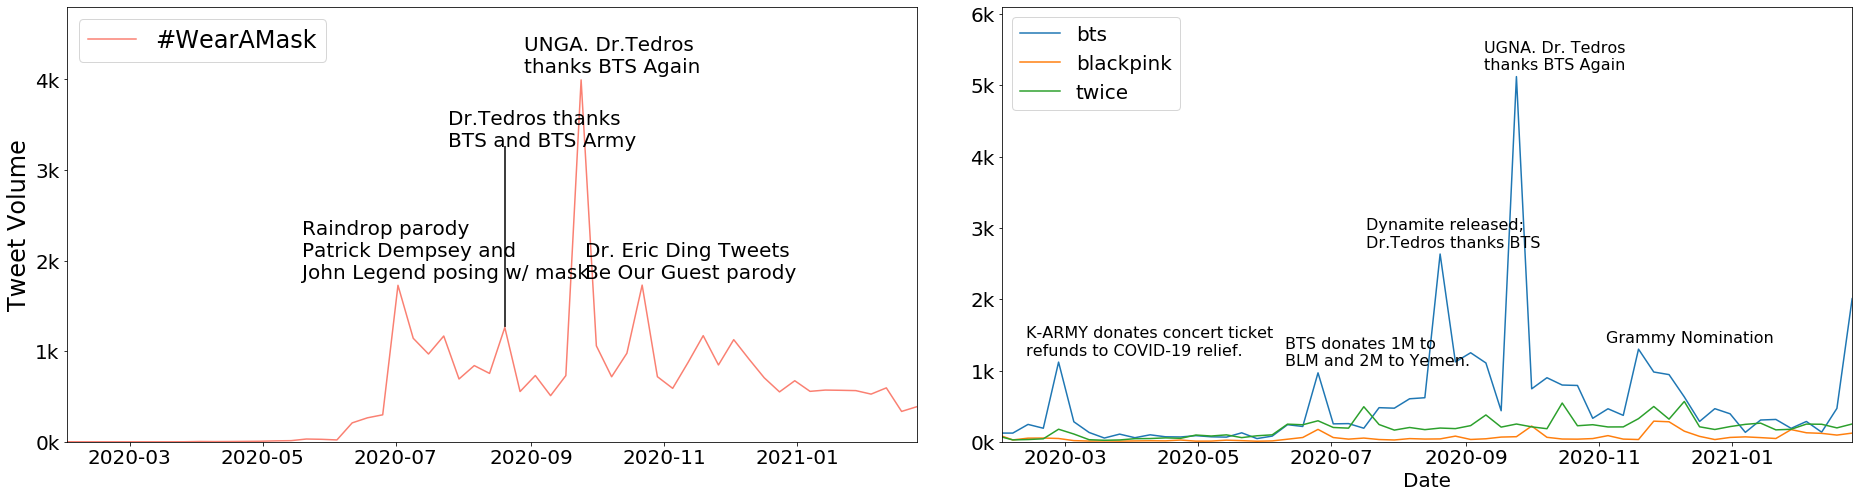

In [54]:
plt.figure(figsize=(32,8))
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.subplot(1,2,1)
EVENTS = {datetime.date(2020,7,2): "Raindrop parody \nPatrick Dempsey and \nJohn Legend posing w/ mask",
          datetime.date(2020,8,20): "Dr.Tedros thanks \nBTS and BTS Army",
          datetime.date(2020,9,24): "UNGA. Dr.Tedros \nthanks BTS Again",
          datetime.date(2020,10,22): "Dr. Eric Ding Tweets \nBe Our Guest parody",
#          datetime.date(2020,11,19): "Thanksgiving",
         }
df_TS = df2.ts_index.value_counts().sort_index()
plt.plot(df_TS.index, df_TS.values, label = r"#WearAMask", color="salmon")
for i,(k,v) in enumerate(EVENTS.items()):
    try:
        height = df_TS[df_TS.index == k]
        if k == datetime.date(2020,8,20):
            plt.vlines(k,height,height+100000)
            plt.annotate(v, (k-datetime.timedelta(days=26),height+100000), fontsize=20)
        elif k == datetime.date(2020,7,2):
#             plt.vlines(k,height,height+100000)
            plt.annotate(v, (k-datetime.timedelta(days=44),height+4000), fontsize=20)
#         elif k == datetime.date(2020,9,24):
#             plt.annotate(v, (k-datetime.timedelta(days=20),height+1500), fontsize=16)
        else:
            plt.annotate(v, (k-datetime.timedelta(days=26),height+4000), fontsize=20)
    except:
        pass
plt.xlim(datetime.date(2020,2,1),datetime.date(2021,2,25))
plt.ylim(0,240000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Tweet Volume", fontsize=24)
plt.legend(fontsize=24, loc="upper left")
plt.gca().yaxis.set_major_formatter(tick.FuncFormatter(ytick_formatter))

EVENTS = {datetime.date(2020,2,27): "K-ARMY donates concert ticket\nrefunds to COVID-19 relief.",
          datetime.date(2020,6,25): "BTS donates 1M to\nBLM and 2M to Yemen.",
          datetime.date(2020,8,20): "Dynamite released; \nDr.Tedros thanks BTS",
          datetime.date(2020,9,24): "UGNA. Dr. Tedros\nthanks BTS Again",
          datetime.date(2020,11,19): "Grammy Nomination",
#          datetime.date(2021,2,25): "German radio presenter \n equates BTS with Covid-19"
         }
plt.subplot(1,2,2)
for top in ["bts", "blackpink", "twice"]:
    df_TS = df3[df3[top]].ts_index.value_counts().sort_index()
    plt.plot(df_TS.index, df_TS.values, label= top)
    
df_TS = df3[df3["bts"]].ts_index.value_counts().sort_index()
for i,(k,v) in enumerate(EVENTS.items()):
    print(k-datetime.timedelta(days=5))
    height = df_TS[df_TS.index == k]
    if k == datetime.date(2020,8,20):
#         plt.vlines(k,height,height+100000)
        plt.annotate(v, (k-datetime.timedelta(days=34),height+10000), fontsize=16)
    else:
        plt.annotate(v, (k-datetime.timedelta(days=15),height+10000), fontsize=16)
    

plt.xlim(datetime.date(2020,2,1),datetime.date(2021,2,25))
plt.ylim(0,610000)    
plt.legend(fontsize=20, loc="upper left")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Date", fontsize=20)

plt.gca().yaxis.set_major_formatter(tick.FuncFormatter(ytick_formatter))
# plt.ylabel("Tweet Volume", fontsize=20)

# plt.savefig("Double_TS.png",bbox="tight")

In [40]:
def ytick_formatter(x,y):
    return str(y)[:3] + "k"

In [72]:
import matplotlib
matplotlib.style.use("seaborn-white")

2020-02-22
2020-06-20
2020-08-15
2020-09-19
2020-11-14


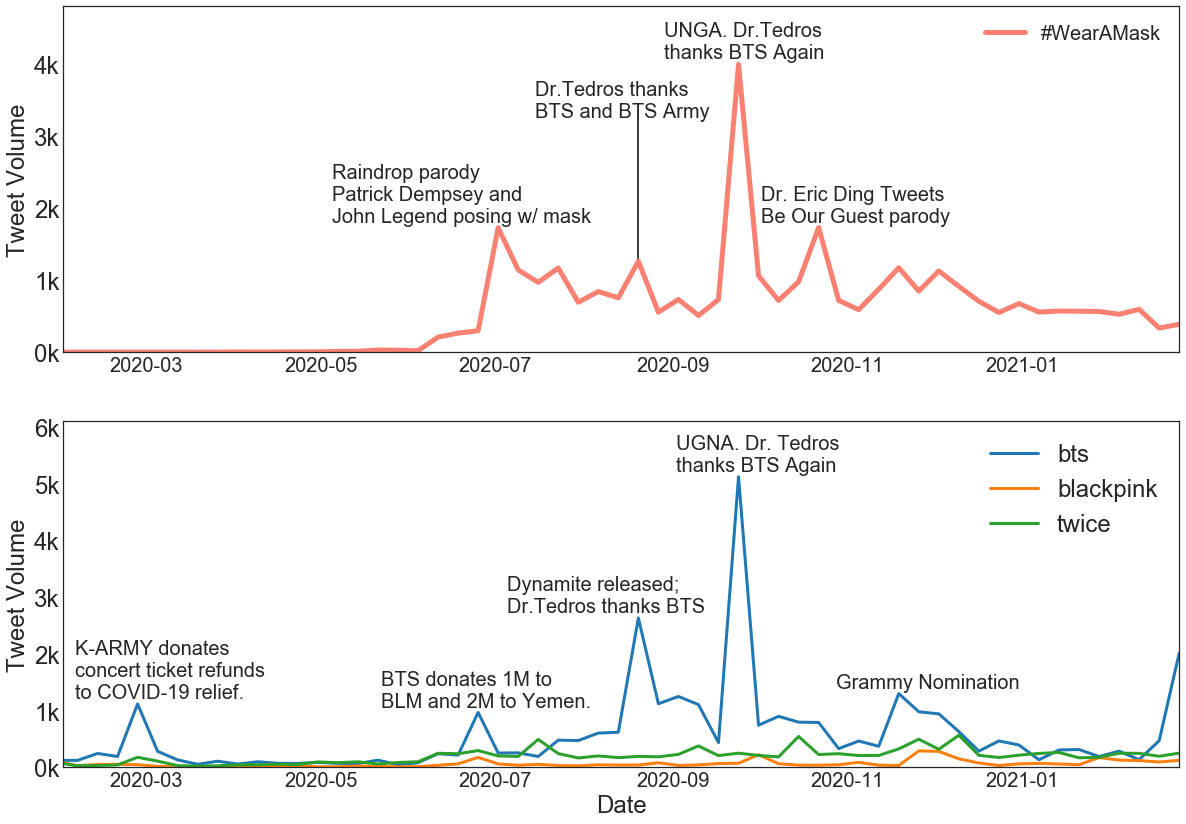

In [77]:
plt.figure(figsize=(20,14))

plt.subplot(2,1,1)
EVENTS = {datetime.date(2020,7,2): "Raindrop parody \nPatrick Dempsey and \nJohn Legend posing w/ mask",
          datetime.date(2020,8,20): "Dr.Tedros thanks \nBTS and BTS Army",
          datetime.date(2020,9,24): "UNGA. Dr.Tedros \nthanks BTS Again",
          datetime.date(2020,10,22): "Dr. Eric Ding Tweets \nBe Our Guest parody",
#          datetime.date(2020,11,19): "Thanksgiving",
         }
df_TS = df2.ts_index.value_counts().sort_index()
plt.plot(df_TS.index, df_TS.values, label = r"#WearAMask", color="salmon", linewidth=5)
for i,(k,v) in enumerate(EVENTS.items()):
    try:
        height = df_TS[df_TS.index == k]
        if k == datetime.date(2020,8,20):
            plt.vlines(k,height,height+100000)
            plt.annotate(v, (k-datetime.timedelta(days=36),height+100000), fontsize=20)
        elif k == datetime.date(2020,7,2):
#             plt.vlines(k,height,height+100000)
            plt.annotate(v, (k-datetime.timedelta(days=58),height+4000), fontsize=20)
        elif k == datetime.date(2020,10,22):
#             plt.vlines(k,height,height+100000)
            plt.annotate(v, (k-datetime.timedelta(days=20),height+4000), fontsize=20)
#         elif k == datetime.date(2020,9,24):
#             plt.annotate(v, (k-datetime.timedelta(days=20),height+1500), fontsize=16)
        else:
            plt.annotate(v, (k-datetime.timedelta(days=26),height+4000), fontsize=20)
    except:
        pass
plt.xlim(datetime.date(2020,2,1),datetime.date(2021,2,25))
plt.ylim(0,240000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=24)
plt.ylabel("Tweet Volume", fontsize=24)
plt.legend(fontsize=20)
plt.gca().yaxis.set_major_formatter(tick.FuncFormatter(ytick_formatter))

EVENTS = {datetime.date(2020,2,27): "K-ARMY donates \nconcert ticket refunds \nto COVID-19 relief.",
          datetime.date(2020,6,25): "BTS donates 1M to\nBLM and 2M to Yemen.",
          datetime.date(2020,8,20): "Dynamite released; \nDr.Tedros thanks BTS",
          datetime.date(2020,9,24): "UGNA. Dr. Tedros\nthanks BTS Again",
          datetime.date(2020,11,19): "Grammy Nomination",
#          datetime.date(2021,2,25): "German radio presenter \n equates BTS with Covid-19"
         }
plt.subplot(2,1,2)
for top in ["bts", "blackpink", "twice"]:
    df_TS = df3[df3[top]].ts_index.value_counts().sort_index()
    plt.plot(df_TS.index, df_TS.values, label= top, linewidth=3)
    
df_TS = df3[df3["bts"]].ts_index.value_counts().sort_index()
for i,(k,v) in enumerate(EVENTS.items()):
    print(k-datetime.timedelta(days=5))
    height = df_TS[df_TS.index == k]
    if k == datetime.date(2020,8,20):
#         plt.vlines(k,height,height+100000)
        plt.annotate(v, (k-datetime.timedelta(days=46),height+10000), fontsize=20)
    elif k == datetime.date(2020,6,25):
#         plt.vlines(k,height,height+100000)
        plt.annotate(v, (k-datetime.timedelta(days=34),height+10000), fontsize=20)
    else:
        plt.annotate(v, (k-datetime.timedelta(days=22),height+10000), fontsize=20)
    

plt.xlim(datetime.date(2020,2,1),datetime.date(2021,2,25))
plt.ylim(0,610000)    
plt.legend(fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=24)
plt.xlabel("Date", fontsize=24)
plt.ylabel("Tweet Volume", fontsize=24)
plt.gca().yaxis.set_major_formatter(tick.FuncFormatter(ytick_formatter))

plt.savefig("figures/Double_TS.png",bbox_inches="tight")

2020-02-22
2020-06-20
2020-08-15
2020-09-19
2020-11-14


Text(0, 0.5, 'BTS Tweets')

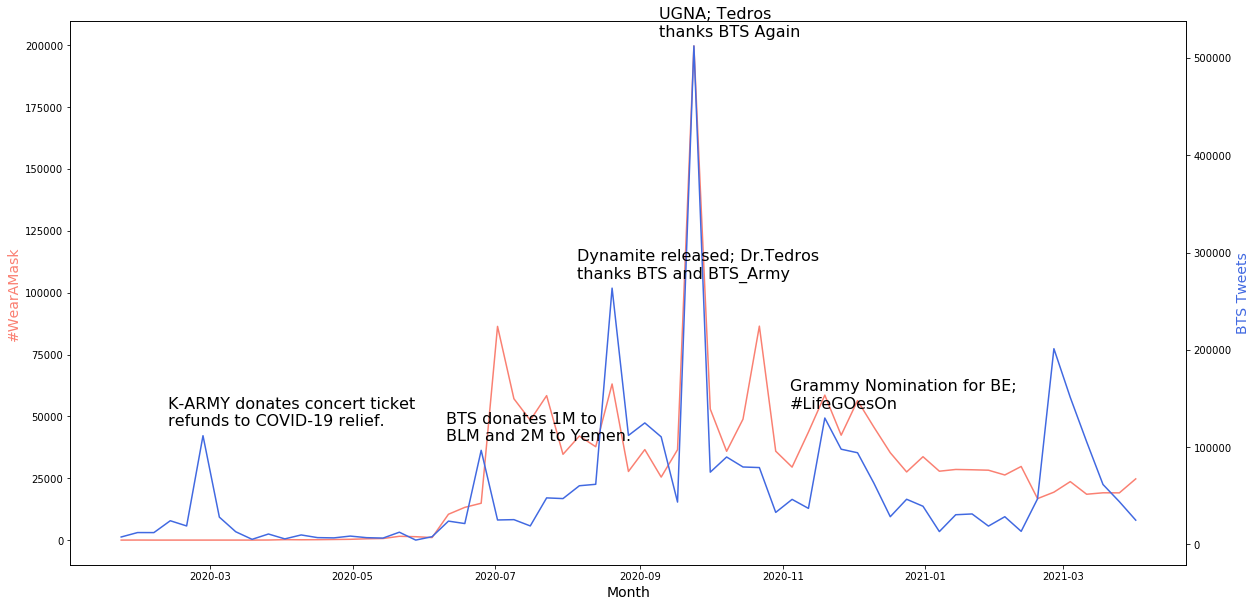

In [56]:
# plt.figure(figsize=(20,10))
fig,ax = plt.subplots(figsize=(20,10))

EVENTS = {datetime.date(2020,7,2): "Raindrop parody by \n Patric Dempsey and \nJohn Legend posing w/ mask",
          datetime.date(2020,8,20): "Dr.Tedros thanks \nBTS and BTS_Army",
          datetime.date(2020,9,24): "UNGA/Dr.Tedros thanks \nBTS and J-Hope Again",
          datetime.date(2020,10,22): "Dr. Eric Ding Tweets \nBe Our Guest parody",
#          datetime.date(2020,11,19): "Thanksgiving",
         }

df_TS = df2.ts_index.value_counts().sort_index()
ax.plot(df_TS.index, df_TS.values, label = r"#WearAMask", color="salmon")
ax.set_xlabel("Month",fontsize=14)
ax.set_ylabel("#WearAMask",color="salmon",fontsize=14)

EVENTS = {datetime.date(2020,2,27): "K-ARMY donates concert ticket\nrefunds to COVID-19 relief.",
          datetime.date(2020,6,25): "BTS donates 1M to\nBLM and 2M to Yemen.",
          datetime.date(2020,8,20): "Dynamite released; Dr.Tedros\nthanks BTS and BTS_Army",
          datetime.date(2020,9,24): "UGNA; Tedros\nthanks BTS Again",
          datetime.date(2020,11,19): "Grammy Nomination for BE;\n#LifeGOesOn",
#          datetime.date(2021,2,25): "German radio presenter \n equates BTS with Covid-19"
         }

ax2=ax.twinx()

df_TS = df3[df3[top]].ts_index.value_counts().sort_index()
ax2.plot(df_TS.index, df_TS.values, label= "BTS Tweets",color="royalblue")
for i,(k,v) in enumerate(EVENTS.items()):
    print(k-datetime.timedelta(days=5))
    height = df_TS[df_TS.index == k]
    ax2.annotate(v, (k-datetime.timedelta(days=15),height+10000), fontsize=16)

ax2.set_ylabel("BTS Tweets",color="royalblue",fontsize=14)
# plt.show()
# # save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')


2020-02-22
2020-06-20
2020-08-15
2020-09-19
2020-11-14


Text(0, 0.5, 'Tweet Volume')

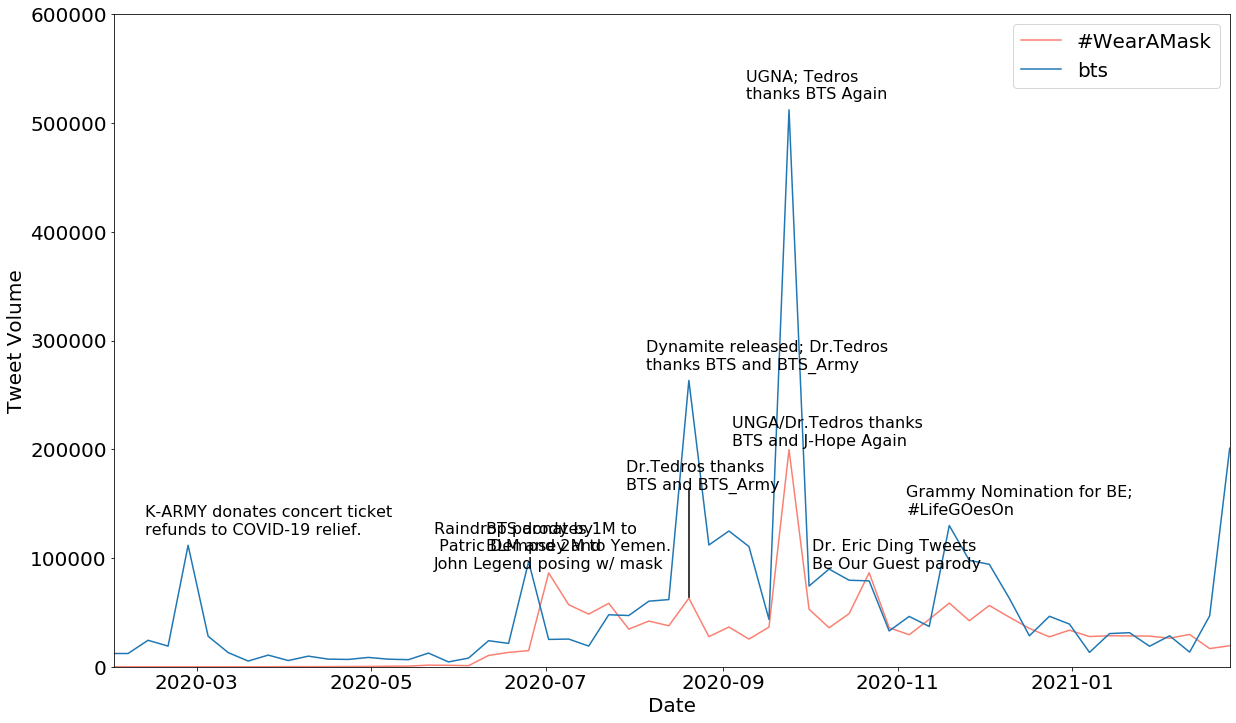

In [52]:
plt.figure(figsize=(20,12))

EVENTS = {datetime.date(2020,7,2): "Raindrop parody by \n Patric Dempsey and \nJohn Legend posing w/ mask",
          datetime.date(2020,8,20): "Dr.Tedros thanks \nBTS and BTS_Army",
          datetime.date(2020,9,24): "UNGA/Dr.Tedros thanks \nBTS and J-Hope Again",
          datetime.date(2020,10,22): "Dr. Eric Ding Tweets \nBe Our Guest parody",
#          datetime.date(2020,11,19): "Thanksgiving",
         }
df_TS = df2.ts_index.value_counts().sort_index()
plt.plot(df_TS.index, df_TS.values, label = r"#WearAMask", color="salmon")
for i,(k,v) in enumerate(EVENTS.items()):
    try:
        height = df_TS[df_TS.index == k]
        if k == datetime.date(2020,8,20):
            plt.vlines(k,height,height+100000)
            plt.annotate(v, (k-datetime.timedelta(days=22),height+100000), fontsize=16)
        elif k == datetime.date(2020,7,2):
#             plt.vlines(k,height,height+100000)
            plt.annotate(v, (k-datetime.timedelta(days=40),height+4000), fontsize=16)
        else:
            plt.annotate(v, (k-datetime.timedelta(days=20),height+4000), fontsize=16)
    except:
        pass
plt.xlim(datetime.date(2020,2,1),datetime.date(2021,2,25))
plt.ylim(0,230000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Tweet Volume", fontsize=20)
plt.legend(fontsize=20)

EVENTS = {datetime.date(2020,2,27): "K-ARMY donates concert ticket\nrefunds to COVID-19 relief.",
          datetime.date(2020,6,25): "BTS donates 1M to\nBLM and 2M to Yemen.",
          datetime.date(2020,8,20): "Dynamite released; Dr.Tedros\nthanks BTS and BTS_Army",
          datetime.date(2020,9,24): "UGNA; Tedros\nthanks BTS Again",
          datetime.date(2020,11,19): "Grammy Nomination for BE;\n#LifeGOesOn",
#          datetime.date(2021,2,25): "German radio presenter \n equates BTS with Covid-19"
         }
for top in ["bts"]:
    df_TS = df3[df3[top]].ts_index.value_counts().sort_index()
    plt.plot(df_TS.index, df_TS.values, label= top)
    
df_TS = df3[df3["bts"]].ts_index.value_counts().sort_index()
for i,(k,v) in enumerate(EVENTS.items()):
    print(k-datetime.timedelta(days=5))
    height = df_TS[df_TS.index == k]
    plt.annotate(v, (k-datetime.timedelta(days=15),height+10000), fontsize=16)

plt.xlim(datetime.date(2020,2,1),datetime.date(2021,2,25))
plt.ylim(0,600000)    
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Tweet Volume", fontsize=20)
